In [1]:
from keras.datasets import imdb


num_words = 10000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in x_train[10]])
decoded_review

"? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls br br black mag

In [3]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(x_train, max_len)
x_test = pad_sequences(x_test, max_len)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN

model_1 = Sequential([
    Embedding(num_words, 32),
    SimpleRNN(32),
    Dense(1, activation="sigmoid")
])

model_1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
history_1 = model_1.fit(x_train, y_train, epochs=10, batch_size=256, validation_split=0.3)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - acc: 0.5816 - loss: 0.6730 - val_acc: 0.7575 - val_loss: 0.5449
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - acc: 0.7962 - loss: 0.4742 - val_acc: 0.8095 - val_loss: 0.4490
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - acc: 0.8403 - loss: 0.3801 - val_acc: 0.8219 - val_loss: 0.4076
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - acc: 0.8623 - loss: 0.3362 - val_acc: 0.8584 - val_loss: 0.3537
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - acc: 0.8875 - loss: 0.2819 - val_acc: 0.8479 - val_loss: 0.3622
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - acc: 0.9118 - loss: 0.2266 - val_acc: 0.8276 - val_loss: 0.4155
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - acc: 0.9314 - loss: 0.1853 - val_acc: 0.7499 - val_loss: 0.5750
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - acc: 0.9497 - loss: 0.1439 - val_acc: 0.8469 - val_loss: 0.4323
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - a

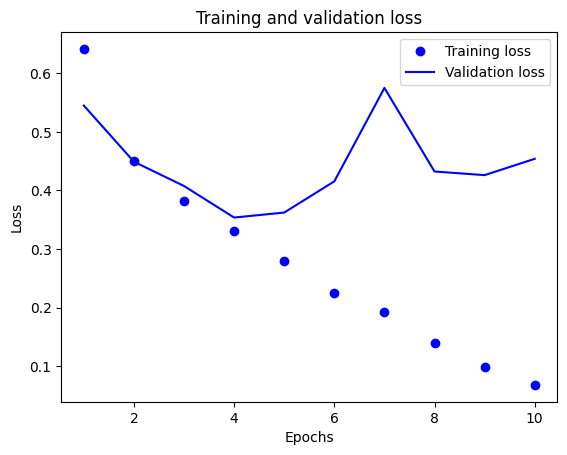

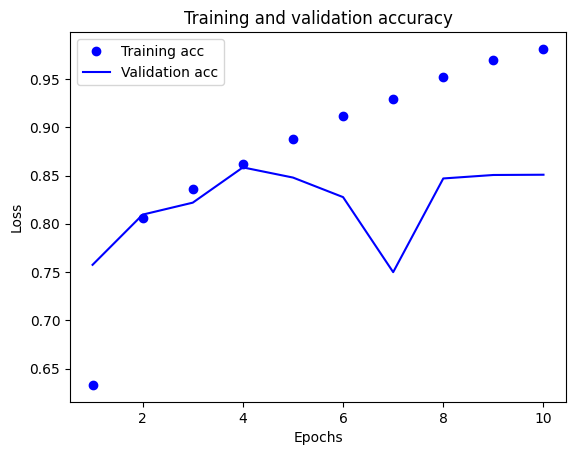

In [6]:
import matplotlib.pyplot as plt


history_dict = history_1.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_acc']
plt.plot(epochs, history_dict['acc'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [10]:
loss, accuracy = model_1.evaluate(x_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.8468 - loss: 0.4678
Loss: 0.46780925989151, Accuracy: 0.8471199870109558


In [8]:
from keras.layers import LSTM

model_2 = Sequential([
    Embedding(num_words, 32),
    LSTM(32),
    Dense(1, activation="sigmoid")
])

model_2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [9]:
history_2 = model_2.fit(x_train, y_train, epochs=10, batch_size=256, validation_split=0.3)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 30s 417ms/step - acc: 0.5332 - loss: 0.6889 - val_acc: 0.6780 - val_loss: 0.6099
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 26s 382ms/step - acc: 0.7360 - loss: 0.5520 - val_acc: 0.7509 - val_loss: 0.5142
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 30s 435ms/step - acc: 0.8018 - loss: 0.4421 - val_acc: 0.8291 - val_loss: 0.3885
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 30s 437ms/step - acc: 0.8454 - loss: 0.3670 - val_acc: 0.8528 - val_loss: 0.3598
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 30s 438ms/step - acc: 0.8632 - loss: 0.3350 - val_acc: 0.8615 - val_loss: 0.3363
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 31s 443ms/step - acc: 0.8722 - loss: 0.3138 - val_acc: 0.8181 - val_loss: 0.4073
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 31s 444ms/step - acc: 0.8826 - loss: 0.2900 - val_acc: 0.8679 - val_loss: 0.3231
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 31s 445ms/step - acc: 0.8762 - loss: 0.3114 - val_acc: 0.8587 - val_loss: 0.3318
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 31s 446ms/

In [11]:
loss, accuracy = model_2.evaluate(x_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - acc: 0.8391 - loss: 0.3679
Loss: 0.36636120080947876, Accuracy: 0.8406400084495544


In [12]:
from keras.layers import Bidirectional

model_3 = Sequential([
    Embedding(num_words, 32),
    Bidirectional(LSTM(32)),
    Dense(1, activation="sigmoid")
])

model_3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [13]:
history_3 = model_3.fit(x_train, y_train, epochs=10, batch_size=256, validation_split=0.3)

Epoch 1/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - acc: 0.5137 - loss: 0.6927 - val_acc: 0.6204 - val_loss: 0.6848
Epoch 2/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - acc: 0.6510 - loss: 0.6417 - val_acc: 0.7839 - val_loss: 0.4755
Epoch 3/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - acc: 0.7843 - loss: 0.4758 - val_acc: 0.8109 - val_loss: 0.4325
Epoch 4/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - acc: 0.8212 - loss: 0.4075 - val_acc: 0.8341 - val_loss: 0.3932
Epoch 5/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - acc: 0.8406 - loss: 0.3736 - val_acc: 0.8345 - val_loss: 0.3751
Epoch 6/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - acc: 0.8593 - loss: 0.3436 - val_acc: 0.8513 - val_loss: 0.3535
Epoch 7/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - acc: 0.8683 - loss: 0.3255 - val_acc: 0.8688 - val_loss: 0.3176
Epoch 8/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - acc: 0.8799 - loss: 0.3012 - val_acc: 0.8101 - val_loss: 0.4716
Epoch 9/10
69/69 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - acc: 0.8721 - loss

In [14]:
loss, accuracy = model_3.evaluate(x_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - acc: 0.8583 - loss: 0.3713
Loss: 0.3755112588405609, Accuracy: 0.8552799820899963


In [16]:
from keras.layers import Dropout

model_4 = Sequential([
    Embedding(num_words, 32),
    Bidirectional(LSTM(32, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(32)),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [19]:
history_4 = model_4.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 117s 853ms/step - acc: 0.7637 - loss: 0.5146 - val_acc: 0.8657 - val_loss: 0.3249
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 115s 843ms/step - acc: 0.9093 - loss: 0.2506 - val_acc: 0.8803 - val_loss: 0.2969
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 115s 843ms/step - acc: 0.9434 - loss: 0.1687 - val_acc: 0.8624 - val_loss: 0.3319
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 115s 838ms/step - acc: 0.9594 - loss: 0.1309 - val_acc: 0.8768 - val_loss: 0.3762
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 116s 846ms/step - acc: 0.9760 - loss: 0.0812 - val_acc: 0.8525 - val_loss: 0.4794


In [20]:
loss, accuracy = model_4.evaluate(x_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - acc: 0.8498 - loss: 0.4903
Loss: 0.48695167899131775, Accuracy: 0.8506399989128113


# Висновки

Як бачимо, рухаючись від найпростішої моделі із звичайною рекурнтною мережею, до LSTM, а потім використовуючи BRNN та DRNN
ми постійно збільшували точність на валідації, однак наші моделі тренувалися довше.
Для себе підмітив, що регуляризатор Адам є більш підходящим для рекурентних мереж, а також підібрав оптимальній батч сайз 128.